$$\textbf{Blatt 08 - Praktische Optimierung - Adrian Lentz, Robert Schönewald}$$

Lösungen und Erklärungen für Blatt 08. $$\newline$$
Adrian Lentz - Matrikelnummer: 258882 $$\newline$$
Robert Schönewald - Matrikelnummer: 188252

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from gplearn.genetic import SymbolicRegressor

np.random.seed(0)

$$\textbf{Teil a}$$

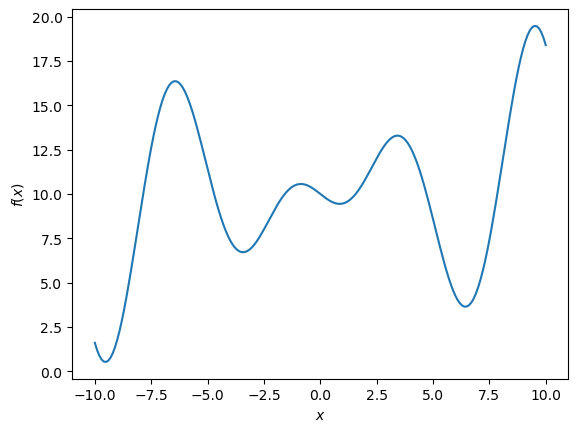

In [2]:
def true_fun(x):
    return 10 - x * np.cos(x)

LOWER = -10
UPPER = 10
N_Samples = 11
X_samples=np.linspace(LOWER,UPPER,N_Samples)
y_samples=true_fun(X_samples)

X = np.linspace(LOWER, UPPER, 201)  #201 äquidistante Stellen
plt.plot(X, true_fun(X), label="True function")
plt.xlabel("$x$")
plt.ylabel("$f(x)$")

plt.show()

$$\textbf{Polynomial Modell}$$

In [3]:
def make_poly_model(f, k, X_samples, y_samples):
    # Erstellung der Polynomialfeatures und Lineare Regression
    polynomial_features = PolynomialFeatures(degree=k, include_bias=True)
    linear_regression = LinearRegression()
    pipe = Pipeline(
        [
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression),
        ]
    )
    # Modell an den gegebenen Samples fitten
    pipe.fit(X_samples.reshape(-1,1), y_samples.reshape(-1,1))

    return lambda x: pipe.predict(np.array(x).reshape(-1,1)).flatten()


#Test 
#pred_fun = make_poly_model(true_fun, k=1) #k=1,2,5,10,15
#pred_fun(1)

In [4]:
degrees = [1,2,5,10,15] #k=1,2,5,10,15
NUM_OF_REPEATS = 1

pred_funcs = {}
for degree in degrees:
    pred_funcs[degree]=[]
    for _ in range(NUM_OF_REPEATS):
        pred_funcs[degree].append(make_poly_model(true_fun, k=degree, X_samples=X_samples, y_samples=y_samples))

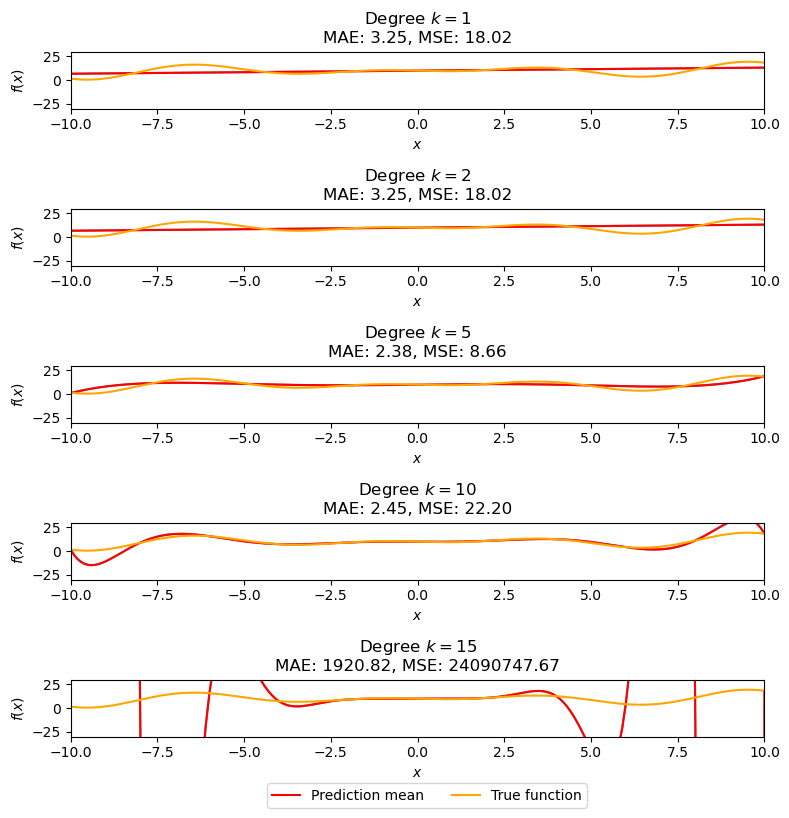

In [5]:
fig = plt.figure(figsize=(8, 8))

true_y = true_fun(X)
mean_y_k, vars_y_k = {}, {}

mse_scores, mae_scores = {},{}

for idx,degree in enumerate(degrees):
    plt.subplot(5,1,idx+1)
    
    # plot predicted functions
    pred_y = np.zeros((NUM_OF_REPEATS,len(X)))

    for i, pred_f in enumerate(pred_funcs[degree]):
        pred_y[i] = pred_f(X)
        plt.plot(X, pred_y[i], c="gray")#, label="Predicted function")
    
    # calculate mean and variance
    mean_y_k[degree] = np.mean(pred_y, axis=0)
    vars_y_k[degree] = np.var(pred_y, axis=0)

    # calculate MAE and MSE
    mae_scores[degree] = mean_absolute_error(true_y, mean_y_k[degree])
    mse_scores[degree] = mean_squared_error(true_y, mean_y_k[degree])
    
    # plot mean prediction
    plt.plot(X, mean_y_k[degree], color="red", label="Prediction mean"\
                                if degree == degrees[0] else None)
    
    # plot true function
    plt.plot(X, true_y, color="orange", label="True function"\
                            if degree == degrees[0] else None)
    
    plt.xlabel("$x$")
    plt.ylabel("$f(x)$")
    plt.xlim((LOWER, UPPER))
    plt.ylim((-30,30))
    plt.title(f"Degree $k={degree}$\nMAE: {mae_scores[degree]:.2f}, MSE: {mse_scores[degree]:.2f}")
    
fig.legend(loc='lower center', bbox_to_anchor=(0.54, -0.025), ncol=2)

plt.tight_layout()
plt.show()

Werte des MSE können sehr stark varrieren, da MSE sehr empfindlich gegenüber Ausreißern ist. MAE (absolute Fehler) ist relativ robust, da nur absoluten Fehler betrachtet --> Außer für k=15 .

Degree 10:
Max Absolute Fehler: 15.33
Max Squared Fehler: 235.16


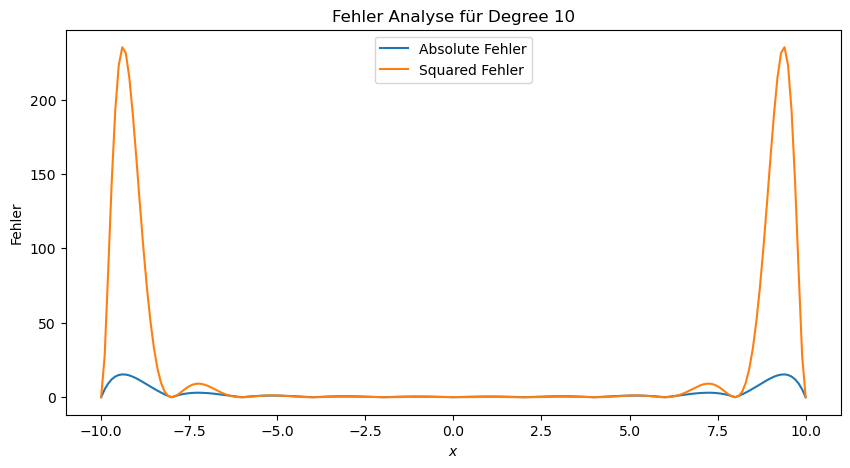

Degree 15:
Max Absolute Fehler: 17795.83
Max Squared Fehler: 316691515.42


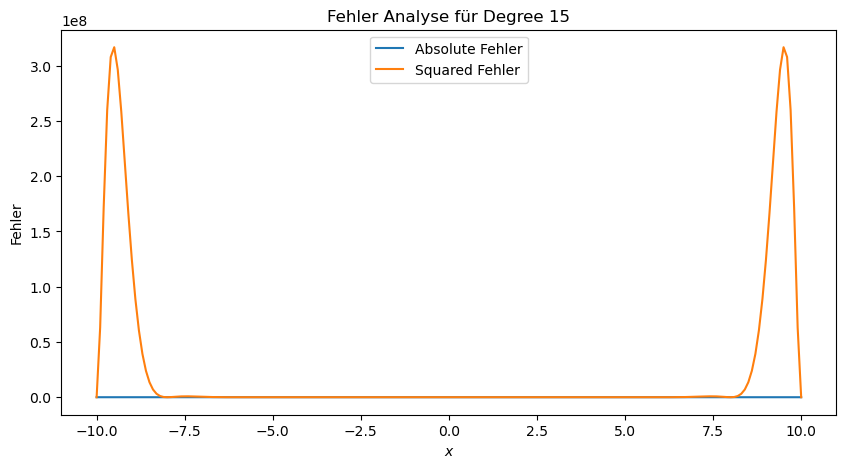

In [6]:
for degree in [10, 15]:
    errors = np.abs(mean_y_k[degree] - true_y)
    squared_errors = (mean_y_k[degree] - true_y) ** 2
    
    print(f"Degree {degree}:")
    print(f"Max Absolute Fehler: {np.max(errors):.2f}")
    print(f"Max Squared Fehler: {np.max(squared_errors):.2f}")
    
    plt.figure(figsize=(10, 5))
    plt.plot(X, errors, label="Absolute Fehler")
    plt.plot(X, squared_errors, label="Squared Fehler")
    plt.xlabel("$x$")
    plt.ylabel("Fehler")
    plt.title(f"Fehler Analyse für Degree {degree}")
    plt.legend()
    plt.show()

Man erkennt das die größten Fehler in den Randbereichen des Definitionsbereich von x auftreten, wobei insbesondere für k=10 der absolute Fehler noch stark ist, für k=15 sind die Fehler noch deutlich größer, sodass in der Abbildung die Fehler-Skalierung deutlich größer ist ! 
Sowohl der absolute und der quadratische Fehler sind für k=15 sehr groß.

$$\textbf{Symbolische Regression}$$

In [7]:
#ergebnisse=[[3.412096883468112, 3.411384119292495, 3.41139416429113, 3.4144380500707427, 3.411589962370803, 3.411587573085578, 3.4123197802444296, 3.4123357068377245, 3.4123352027972116, 3.412225816492165], [3.4310083553729425, 3.4461772054621775, 4.210850094556318, 3.4212849478562743, 3.4298376076071366, 3.4150936225491986, 3.438618800945967, 4.229564625033519, 3.4233138889140546, 3.426234728198251], [2.569084276409377, 2.8461268152512726, 2.258520156416018, 2.83783902426103, 2.355779892079767, 2.1871537902850764, 2.483166645039068, 2.84198989547309, 2.8443472199543574, 2.847968630694601], [1.4467140095101552, 1.86489255061835, 2.0769625127102262, 1.4455295143448579, 1.9123484317260617, 2.845316719842962, 1.8200045343759148, 1.8347978900227104, 2.206795898552612, 1.1770640989925316], [9.000275539865292, 9.000322938444684, 9.000000271636575, 9.000026453618377, 9.000003017806371, 9.000010814467721, 9.000038031606294, 9.000035861688184, 9.000000000000002, 9.000041930961835], [2.539735054230188, 0.4623621105103869, 3.2901547421202135, 0.8555423450398368, 0.995499502819521, 0.3552372235707458, 1.0729669018864543, 0.8366159474659685, 0.4851271015154591, 2.7966886810863514], [0.005132790373879794, 0.42489035092205135, 1.042522364710662, 0.0022239493565253776, 0.06468732111599763, 0.5306720506911966, 0.8386968462634403, 0.5318964825241479, 0.5162446806195534, 0.1522034794703366], [1.5678714477165008, 0.23583224526432112, 0.6925482369724189, 0.12969092310827274, 1.6591612681054635, 0.011107242097641872, 1.133814469470137, 1.5571159174176648, 1.9032059512600894, 0.20470373065054973]]

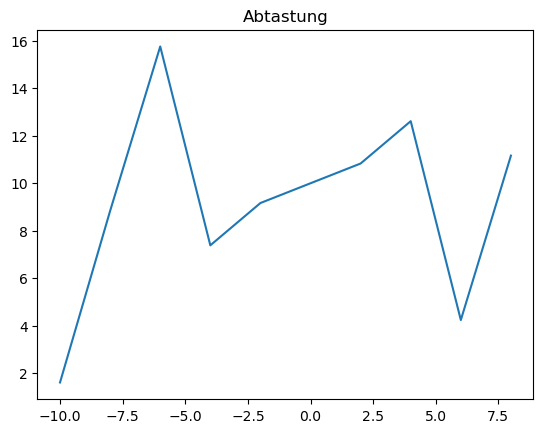

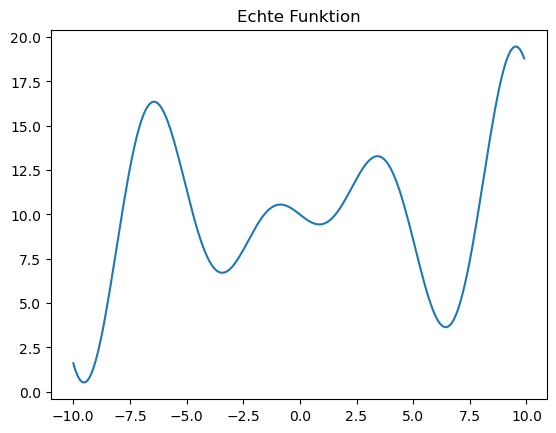

In [9]:
x = np.arange(-10, 10, 2)
x_fine=np.arange(-10, 10, 0.1)
y_truth = 10 - x * np.cos(x)

ax = plt.figure().add_subplot()
plt.plot(x, y_truth)
plt.title("Abtastung")
ax = plt.figure().add_subplot()
plt.plot(x_fine, true_fun(x_fine))
plt.title("Echte Funktion")
plt.show()

In [10]:
# Training samples
X_train = np.arange(-10, 11, 2).reshape(11, 1)
y_train = 10 - X_train * np.cos(X_train)

# Testing samples
X_test = np.arange(-10, 10.1, 0.1).reshape(201, 1)
y_test = 10 - X_test * np.cos(X_test)

In [11]:
combs=[('add','sub'),('mul','div'),('add','mul'),('add','sub','mul','div'),('sin','cos'),('add','mul','sin'),('sub','mul','cos'),('add','sub','mul','div','sin','cos')]
ergebnisse=[]
best_gp= SymbolicRegressor(population_size=500, generations=25, stopping_criteria=0.01,verbose=0,function_set=('sub','mul','cos'),n_jobs=-1,tournament_size=10)
best_gp.fit(X_samples.reshape(-1, 1),y_samples)
for y in combs:
    einzelergebnisse=[]
    for x in range(10):
        est_gp = SymbolicRegressor(population_size=500, generations=25, stopping_criteria=0.01,verbose=0,function_set=y,n_jobs=-1,tournament_size=10)
        est_gp.fit(X_samples.reshape(-1, 1),y_samples)
        #print(est_gp._program.raw_fitness_)
        einzelergebnisse.append(est_gp._program.raw_fitness_)
        if est_gp._program.raw_fitness_<best_gp._program.raw_fitness_:
            best_gp=est_gp
    ergebnisse.append(einzelergebnisse)
print(ergebnisse)

[[3.411708619911212, 3.411531942513665, 3.4136023305596854, 3.4113964343585277, 3.411880289400983, 3.4124747061813423, 3.4121998291115987, 3.413364997392431, 3.411383898561421, 3.4116094848917013], [3.4153887674049845, 3.442384873536167, 3.4352134078684458, 3.414670145568456, 3.418920173232552, 3.5116320663681746, 3.4200534511109066, 3.4384275561038447, 3.4285766773368405, 3.4256793102084613], [2.5723045122523973, 2.4280957416247513, 2.8564893337084247, 2.0277275456189163, 2.5361553977047144, 2.1356172803477236, 2.4947945165883922, 2.8418208239116867, 2.840672689295354, 2.3334363609686735], [1.5834125062464546, 2.51416616946715, 1.5097457699292258, 1.912848739555438, 2.349282325314984, 2.569750667191023, 2.0330740100516724, 2.0884158278891283, 1.1625828561599494, 1.9603730747778376], [9.000005826805717, 9.000020684957786, 9.000051603009597, 9.000191336049134, 9.00004653311491, 9.000284307540108, 9.000009706278716, 9.000090796556465, 9.000012739565573, 9.000014034029956], [1.27676471130

Funktion der Parameter: \
Populationsgröße: \
Das ist die Anzahl von Programmen, die sich in einer Generation befinden. \
Turniergröße: \
Die Anzahl an Programmen, die gegeneinander antreten, um Teil der nächsten Generation zu sein. \
Generationsanzahl: \
Wie viele Generationen durchlaufen werden, bevor gestoppt wird. \
Stoppkriterium: \
Falls vor Ende des Generationslimits ein bestimmter Wert erreicht wird, wird gestoppt.

[Text(0.5, 0, 'Kombinationen'), Text(0, 0.5, 'Fitness')]

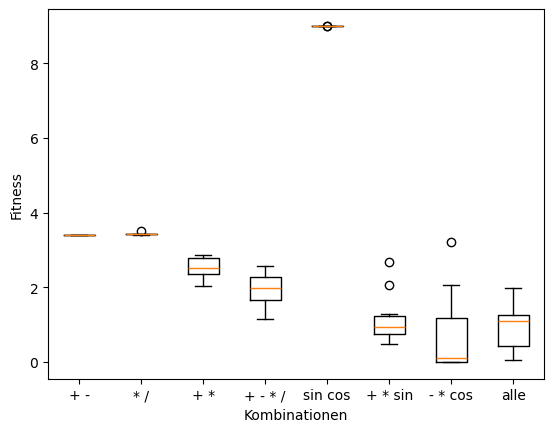

In [12]:
fig, ax = plt.subplots()
ax.boxplot(ergebnisse)
ax.set_xticklabels(['+ -',('* /'),('+ *'),('+ - * /'),('sin cos'),('+ * sin'),('- * cos'),('alle')])
ax.set(xlabel='Kombinationen', ylabel='Fitness')

Es scheint die Kombination "- * cos" konstant die beste Fitness zu erreichen.

In [13]:
print(best_gp._program)

sub(cos(cos(cos(mul(0.922, -0.248)))), sub(sub(sub(sub(0.122, sub(cos(0.740), sub(mul(-0.505, sub(cos(-0.022), sub(X0, X0))), sub(sub(sub(0.809, -0.298), mul(X0, cos(X0))), sub(0.610, 0.793))))), sub(cos(cos(mul(0.922, -0.248))), sub(sub(sub(sub(sub(sub(cos(-0.148), cos(-0.555)), cos(mul(cos(-0.793), cos(-0.148)))), 0.793), sub(sub(0.928, X0), sub(-0.708, X0))), cos(cos(mul(-0.058, 0.772)))), 0.740))), cos(sub(X0, X0))), cos(cos(cos(mul(0.922, -0.248))))))


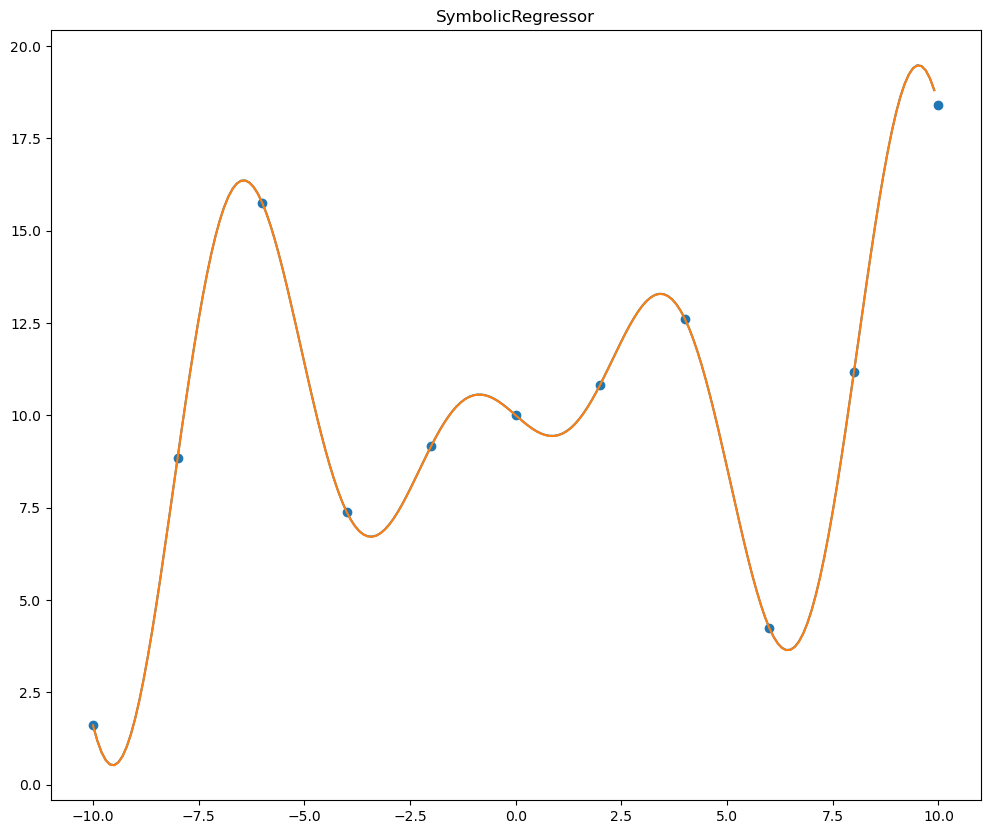

In [16]:
y_gp = best_gp.predict(np.c_[x_fine.ravel()]).reshape(x_fine.shape)
score_gp = best_gp.score(X_test, y_test)
fig = plt.figure(figsize=(12, 10))

ax = fig.add_subplot(1, 1, 1)
plt.plot(x_fine, y_gp)
plt.plot(x_fine, true_fun(x_fine))
points = ax.scatter(X_train, y_train)
plt.title("SymbolicRegressor")
plt.show()

Beide Kurven überdecken sich, man kann vermuten, dass die Abweichungen sehr gering sein werden.

In [22]:
yAbw=true_fun(x_fine)
absAbw=np.sum(np.abs(yAbw-y_gp))/201
print(absAbw)
quaAbw=np.sum((yAbw-y_gp)**2)/201
print(quaAbw)

0.004397242278481326
1.9432418353941956e-05


$$\textbf{Teil b}$$

$$\textbf{Symbolische Regression}$$

In [2]:
def true_fun2(x):
    return 5*np.minimum(x[0],x[1]) - 3 * x[0]

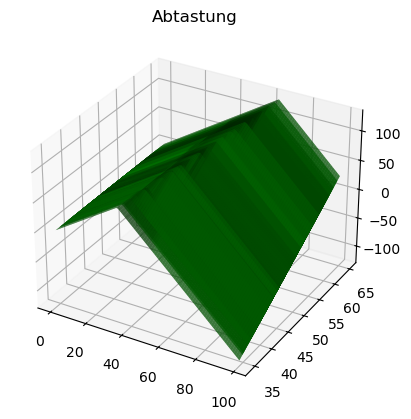

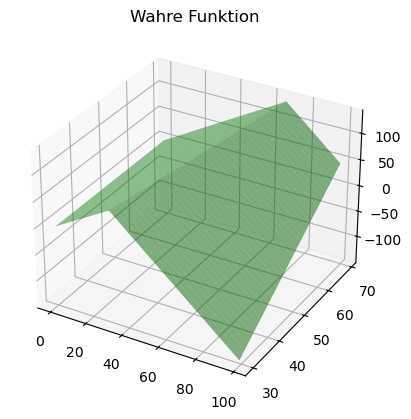

In [19]:
x0 = np.arange(0, 100, 1)
x1 = np.random.normal(50, 7, 100)
x0, x1 = np.meshgrid(x0, x1)
y_truth = 5*np.minimum(x0,x1) - 3 * x0

x0_fine=np.arange(0, 100, 1)
x1_fine=np.arange(30, 70, 1)
x0_fine, x1_fine = np.meshgrid(x0_fine, x1_fine)
y_truth_fine = 5*np.minimum(x0_fine,x1_fine) - 3 * x0_fine

ax = plt.figure().add_subplot(projection='3d')
surf = ax.plot_surface(x0, x1, y_truth, rstride=1, cstride=1,
                       color='green', alpha=0.5)
plt.title("Abtastung")
plt.show()
ax = plt.figure().add_subplot(projection='3d')
surf = ax.plot_surface(x0_fine, x1_fine, y_truth_fine, rstride=1, cstride=1,
                       color='green', alpha=0.5)
plt.title("Wahre Funktion")
plt.show()

In [64]:
# Training samples
a=[]
b=[]
for j in range (100):
    k=np.random.normal(50, 7)
    for i in range(101):   
        a.append(i)
        b.append(k)
X_train=np.stack([a,b],axis=1)
print(X_train)
y_train = 5*np.minimum(X_train[:, 0],X_train[:, 1]) - 3 * X_train[:, 0]

[[  0.          37.22853389]
 [  1.          37.22853389]
 [  2.          37.22853389]
 ...
 [ 98.          53.69217396]
 [ 99.          53.69217396]
 [100.          53.69217396]]


In [66]:
est_gp = SymbolicRegressor(population_size=1000, generations=25, stopping_criteria=0.01,verbose=1,function_set=('min','mul','min'),n_jobs=-1,tournament_size=10)
est_gp.fit(X_train, y_train)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    38.93      3.89979e+12       15          31.8957              N/A      1.27m
   1    19.61      2.20773e+07       15          31.8957              N/A     15.00s
   2    11.31          27390.1       47          30.3462              N/A     16.65s
   3    13.78           170531       51          29.9901              N/A     18.21s
   4    14.00           6765.7       55          29.9901              N/A     18.54s
   5    24.63          45414.4       55          29.1404              N/A     18.60s
   6    46.01           573908       45          28.3967              N/A     19.24s
   7    52.41      1.29288e+08       43          28.3967              N/A     20.01s
   8    56.77          11982.2       31          28.3967              N/A  

SymbolicRegressor(function_set=('min', 'mul', 'min'), generations=25, n_jobs=-1,
                  stopping_criteria=0.01, tournament_size=10, verbose=1)

In [67]:
print(est_gp._program)

min(X1, mul(mul(X0, X1), mul(mul(-0.592, -0.232), 0.273)))


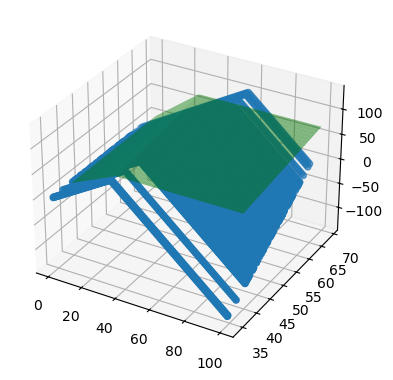

In [68]:
x0 = np.arange(0, 100, 1)
x1 = np.arange(40, 70, 1)
x0, x1 = np.meshgrid(x0, x1)
y_gp = est_gp.predict(np.c_[x0.ravel(), x1.ravel()]).reshape(x0.shape)
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(2, 2, 1, projection='3d')
surf = ax.plot_surface(x0, x1, y_gp, rstride=1, cstride=1, color='green', alpha=0.5)
points = ax.scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.show()

In [76]:
yAbw=true_fun2([x0,x1])
absAbw=np.sum(np.abs(yAbw-y_gp))/4141
print(absAbw)
quaAbw=np.sum((yAbw-y_gp)**2)/4141
print(quaAbw)

19.22553588632645
1008.7567837194632


Im Gegensatz zu dem 2D Fall entstehen hier deutlich größere Fehler